In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df = pd.read_csv("rice_classification.csv")
df


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [66]:
df.shape

(18185, 12)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [68]:
df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [69]:
df.duplicated().sum()

np.int64(0)

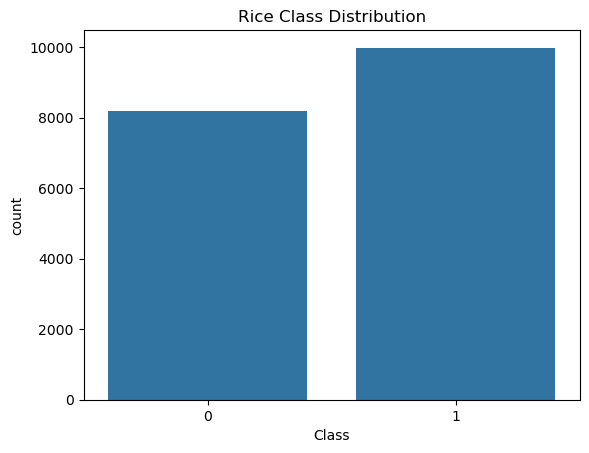

In [70]:
plt.figure()
sns.countplot(x=df['Class'])
plt.title("Rice Class Distribution")
plt.show()


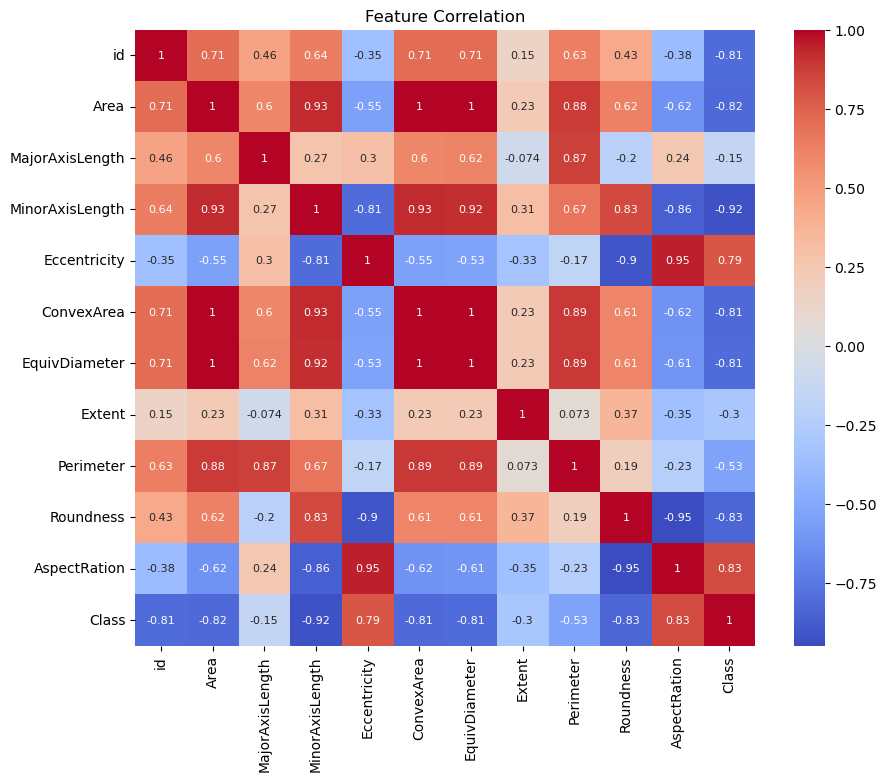

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":8}, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


<Figure size 2000x2000 with 0 Axes>

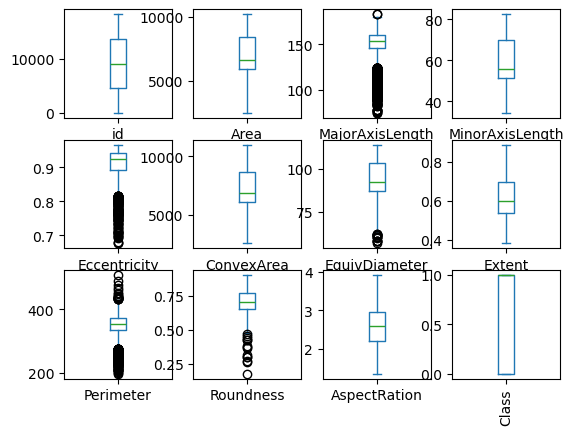

In [72]:
plt.figure(figsize=(20,20))
df.plot( kind='box',subplots=True, layout=(3,4))
plt.xticks(rotation=90)
plt.show()


In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [74]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [75]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression Accuracy: 1.0


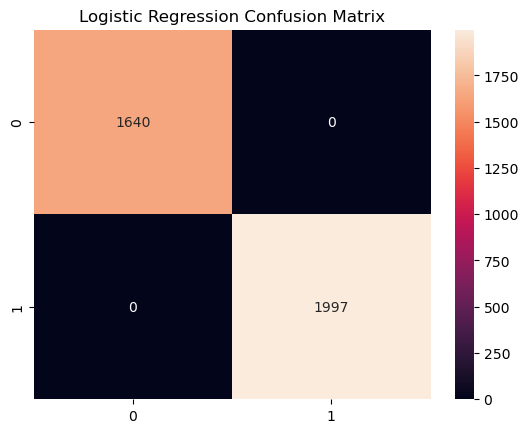

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, C=1.0)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


KNN Accuracy: 1.0
Best K: {'n_neighbors': 3}


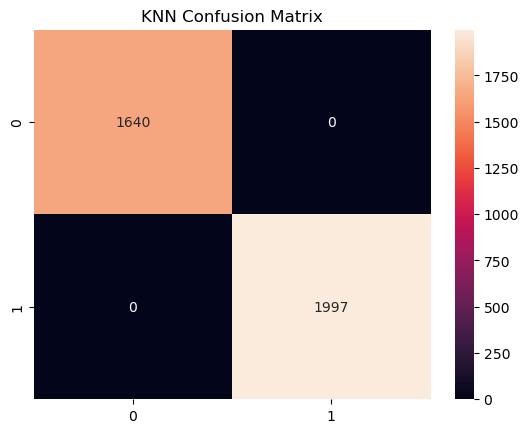

In [77]:
from sklearn.neighbors import KNeighborsClassifier

param_knn = {'n_neighbors': [3,5,7,9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(X_train, y_train)

knn = grid_knn.best_estimator_
knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Best K:", grid_knn.best_params_)

cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("KNN Confusion Matrix")
plt.show()


SVM Accuracy: 1.0
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


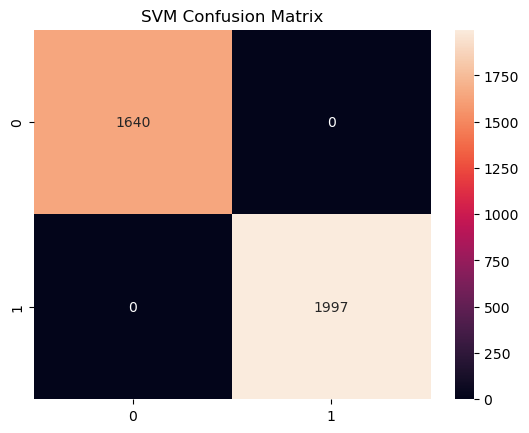

In [78]:
from sklearn.svm import SVC

param_svc = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svc = GridSearchCV(SVC(), param_svc, cv=5)
grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_
svc_pred = svc.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svc_pred))
print("Best Params:", grid_svc.best_params_)

cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.show()


Decision Tree Accuracy: 1.0
Best Params: {'criterion': 'gini', 'max_depth': 5}


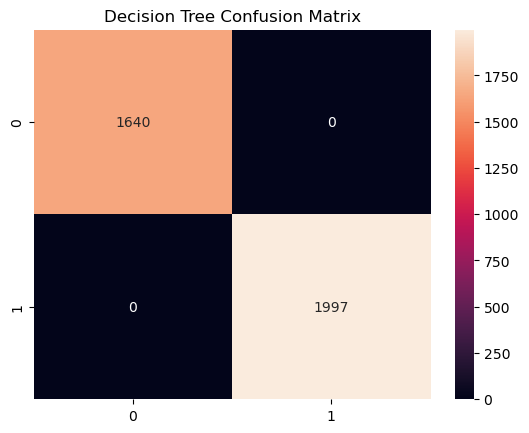

In [79]:
from sklearn.tree import DecisionTreeClassifier

param_dt = {'max_depth': [5,10,15], 'criterion': ['gini','entropy']}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5)
grid_dt.fit(X_train, y_train)

dt = grid_dt.best_estimator_
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Best Params:", grid_dt.best_params_)

cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {
    'n_estimators': [100,200],
    'max_depth': [None,10,20]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5)
grid_rf.fit(X_train, y_train)

rf = grid_rf.best_estimator_
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Best Params:", grid_rf.best_params_)

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_gb = {
    'n_estimators': [100,150],
    'learning_rate': [0.05,0.1]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(), param_gb, cv=5)
grid_gb.fit(X_train, y_train)

gb = grid_gb.best_estimator_
gb_pred = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Best Params:", grid_gb.best_params_)

cm = confusion_matrix(y_test, gb_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


In [ ]:
for name, model in {
    "Logistic Regression": lr,
    "KNN": knn,
    "SVM": svc,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb
}.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: Mean CV Accuracy = {scores.mean():.2f}")
